(3731, 8)


,46A,47A,78,LCBK,string_X_train,Y_label,string_Y_1,string_Y_2
16,+SIGNED COMMERCIAL INVOICE IN 3 ORIGINALS INDI...,"+APPLICANT'S ADDRESS:19F, HAICANG BUSINESS BUI...",+TO NEGOTIATING BANK ONLY : PLEASE FORWARD ALL...,"CTBC BANK CO., LTD",SIGNED COMMERCIAL INVOICE IN 3 ORIGINALS INDI...,CTBC BANK CO LTD,1860,1876
18,+ SIGNED COMMERCIAL INVOICE IN TRIPLICATE+ FUL...,+A DISCREPANCY FEE OF USD80.00(OR EQUIVALENT) ...,+ALL DOCUMENTS MUST BE FORWARDED DIRECTLY TO O...,"INDUSTRIAL BANK OF KOREA, SEOUL",SIGNED COMMERCIAL INVOICE IN TRIPLICATE FULL ...,INDUSTRIAL BANK OF KOREA SEOUL,874,904
19,+ SIGNED COMMERCIAL INVOICE IN TRIPLICATE+ FUL...,+A DISCREPANCY FEE OF USD80.00(OR EQUIVALENT) ...,+ALL DOCUMENTS MUST BE FORWARDED DIRECTLY TO O...,"INDUSTRIAL BANK OF KOREA, SEOUL",SIGNED COMMERCIAL INVOICE IN TRIPLICATE FULL ...,INDUSTRIAL BANK OF KOREA SEOUL,874,904
22,+SIGNED COMMERCIAL INVOICE IN 2 ORIGINALINDICA...,+THIS L/C IS PAYABLE 30 DAYS AFTER B/L DATE (B...,+TO NEGOTIATING BANK ONLY: PLEASE FORWARD ALL ...,"CTBC BANK CO., LTD.",SIGNED COMMERCIAL INVOICE IN 2 ORIGINALINDICA...,CTBC BANK CO LTD,4924,4940
23,+SIGNED COMMERCIAL INVOICE IN 2 ORIGINALINDICA...,+THIS L/C IS PAYABLE 30 DAYS AFTER B/L DATE (B...,+TO NEGOTIATING BANK ONLY: PLEASE FORWARD ALL ...,"CTBC BANK CO., LTD.",SIGNED COMMERCIAL INVOICE IN 2 ORIGINALINDICA...,CTBC BANK CO LTD,4924,4940


(2984, 8)
(747, 8)


Global seed set to 42
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should pr


epoch:0 train_loss:0.7983141725617511 val_loss:0.34928780666963066
save best_model now_val_best_loss is:0.34928780666963066



epoch:1 train_loss:0.35152327765270025 val_loss:0.265665465375028
save best_model now_val_best_loss is:0.265665465375028



epoch:2 train_loss:0.26152961434166183 val_loss:0.23397944604737625
save best_model now_val_best_loss is:0.23397944604737625



epoch:3 train_loss:0.15785441367493588 val_loss:0.2610001520075965



epoch:4 train_loss:0.2129169247660508 val_loss:0.2609356690738951



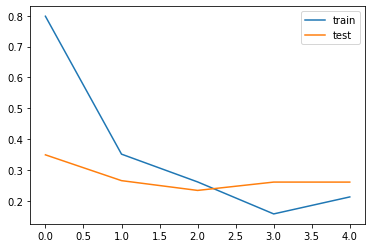

best_model is saved!


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this mode

,jaccard,acc(1.0),acc(0.75),acc(0.5),acc(0.25)
0,0.836859,0.686747,0.716198,0.894244,0.950469


,Y_label,predict,是否全對
7209,KEB HANA BANK,KEB HANA BANK,Yes
19459,CHINA CITIC BANK,SERVICECHINA CITIC BANK,No
7585,SHINHAN BANK,SHINHAN BANK,Yes
15330,MUFG BANK LTD,MUFG BANK LTD,Yes
1644,CTBC BANK CO LTD,CTBC BANK CO LTD,Yes
...,...,...,...
5404,NONGHYUP BANK,NONGHYUP BANK,Yes
15244,BANK OF BARODA,OFBANK OF BARODADUBAI,No
15834,INDUSTRIAL BANK OF KOREA SEOUL,INDUSTRIAL BANK OF KOREAMARKED,No
934,OCBC WING HANG BANK CHINA LIMITED,OCBC WING HANG BANK CHINA LIMITED,No


In [1]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/preprocess_for_SQUAD_銀行.csv',index_col=0)
print(df.shape)
display(df.head())
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
print(train_df.shape)
print(val_df.shape)
url = 'https://gist.githubusercontent.com/skywalker0803r/1e1d0d25999094bf8ec23dc143e02478/raw/0ac62d4a6efe4b7f9cc58ff8ff614aca7603fa25/bert_train_pipeline.py'
exec(requests.get(url).text)
res,table = bert_train_pipeline(train_df,val_df,
                                qustion = 'What is the bank name?',
                                model_path = '../models/Product_Data_SQuAD_model_銀行.pt',
                                max_epochs = 5,
                                )
display(res)
display(table)